In [114]:
# Download a youtube video (Chinese)
# https://github.com/slhck/ffmpeg-normalize

from pytube import YouTube


chineseVideos = ['LfMoOjztz9A', 'z5OGUEbz5vA', 
                 'n5T4w5Cv684', 'dhamGcr8d4Q', 
                 'b3n7-4JlUSU', 'Q6xnz1sl9fc', 
                 'XWgvvq6-8no', 'fN6kNbz8JKo']

englishVideos = ['w-Nwy758gBo', 'RsOpnFbufcY', 
                 'qJ1rdVEcl5g', '-oIIZJeVGpc', 
                 'G3ZY6L-SXy0', 'ycPr5-27vSI']

def downloadVideos(videos):
    yt = YouTube('http://youtube.com/watch?v=w-Nwy758gBo')
    yt.streams.filter(only_audio=True, subtype='mp4').first().download()
    
downloadVideos([])
    

KeyboardInterrupt: 

In [ ]:
# http://yerevann.github.io/2016/06/26/combining-cnn-and-rnn-for-spoken-language-identification/
# https://github.com/YerevaNN/Spoken-language-identification
# https://community.topcoder.com/longcontest/?module=ViewProblemStatement&rd=16555&pm=13978
# http://yerevann.github.io/2015/10/11/spoken-language-identification-with-deep-convolutional-networks/
# https://github.com/YerevaNN/Spoken-language-identification/blob/master/augment_data.py

In [147]:
from pathlib import Path
chineseAudioPath = Path('data/audioFilesChinese')
englishAudioPath = Path('data/audioFilesEnglish')


chineseAudioFiles = [ 
    {'path': chineseAudioPath/'sample2.mp4', 'prefix': 'twvlog'},
      {'path': chineseAudioPath/'sample3.mp3', 'prefix': 'podcast'},
      {'path': chineseAudioPath/'sample4.mp3', 'prefix': 'podcast2'},
      {'path': chineseAudioPath/'sample5.mp3', 'prefix': 'mainlanderBros'},
      {'path': chineseAudioPath/'sample6.mp3', 'prefix': 'jawawabro'},
    ]

englishAudioFiles = [ 
    {'path': englishAudioPath/'sample1.mp3', 'prefix': 'dndvlog'},
     {'path': englishAudioPath/'sample2.mp3', 'prefix': 'sirajlady'},
     {'path': englishAudioPath/'sample3.mp3', 'prefix': 'sirajguy'},
     {'path': englishAudioPath/'sample4.mp3', 'prefix': 'dndexplained'},
     {'path': englishAudioPath/'sample5.mp3', 'prefix': 'pewdapology'},
     {'path': englishAudioPath/'sample6.mp3', 'prefix': 'codetalk'},
    ]

clipChinesePath = Path('data/clipsChinese')
clipEnglishPath = Path('data/clipsEnglish')

spectrogramsChinese = Path('data/spectrogramsChinese')
spectrogramsEnglish = Path('data/spectrogramsEnglish')


In [159]:
import shutil
shutil.rmtree(clipChinesePath.resolve())
shutil.rmtree(clipEnglishPath.resolve())
shutil.rmtree(spectrogramsChinese.resolve())
shutil.rmtree(spectrogramsEnglish.resolve())

clipChinesePath.mkdir(parents=True, exist_ok=True)
clipEnglishPath.mkdir(parents=True, exist_ok=True)
spectrogramsChinese.mkdir(parents=True, exist_ok=True)
spectrogramsEnglish.mkdir(parents=True, exist_ok=True)

In [160]:
import os
from pydub import AudioSegment
from pydub.utils import get_array_type

# ffmpeg -i WaltAndBryanSpeakingChinese.m4a -acodec pcm_s16le -ar 44100 WaltAndBryanSpeakingChinese.wav
# ffmpeg mono channel
# -ac 1

def generate5SecondClips(audioFile, clipPath, prefix):
    
    fullFilePath = str(audioFile.resolve())
    outFileName = str(audioFile.resolve()).rsplit('/')[-1] + ".wav"
    command = "ffmpeg -i {0} -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/{1}".format(fullFilePath, outFileName)
    print(command)
    os.system(command)
    
    sound = AudioSegment.from_file('/tmp/' + outFileName)
    sound.set_channels(1)
    sound.set_sample_width(1)
    sound.set_frame_rate(44100)
    
    position = 10000
    writeCount = 0
    
    while position + 5000 < len(sound) and writeCount < 30:
        position += 5000
        positionEnd = position + 5000
        startSecs = str(int(position / 1000))
        endSecs = str(int((position + 5000) / 1000))
        clip = sound[position:positionEnd]
        filename = prefix + "-" + startSecs + "-" + endSecs + ".wav"
        clip.export(clipPath/filename, format="wav", bitrate="1411k")
        writeCount += 1
        
    print("Wrote " + str(writeCount) + " clips")

# tmpFilePath = Path('/tmp/audfiles')
# generate5SecondClips(chineseAudioPath/'sample1.mp4', tmpFilePath, 'testfile')

In [161]:
for file in chineseAudioFiles:
    generate5SecondClips(file['path'], clipChinesePath, file['prefix'])



ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesChinese/sample2.mp4 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample2.mp4.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesChinese/sample3.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample3.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesChinese/sample4.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample4.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesChinese/sample5.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample5.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesChinese/sample6.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample6.mp3.wav
Wrote 30 clips


In [162]:
for file in englishAudioFiles:
    generate5SecondClips(file['path'], clipEnglishPath, file['prefix'])

ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesEnglish/sample1.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample1.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesEnglish/sample2.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample2.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesEnglish/sample3.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample3.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesEnglish/sample4.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample4.mp3.wav
Wrote 30 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesEnglish/sample5.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/sample5.mp3.wav
Wrote 17 clips
ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/audioFilesEnglish/sample6.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -

In [155]:
import os
import wave
import pylab
import matplotlib.pyplot as plt

# https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html

def graphSpectrogram(destFolder, wavFile, plot=False):
    sound_info, frame_rate = getWavInfo(wavFile)
    pylab.figure(num=None, figsize=(12, 12))
    pylab.specgram(sound_info, Fs=44100, mode='psd', NFFT=256)
    plt.axis('off')
    outfile = os.path.splitext(wavFile)[0].rsplit('/', 1)[-1]
    print(outfile)
    pylab.savefig(destFolder + '/' + outfile)
    if plot == False:
        pylab.close()


def getWavInfo(wavFile):
    wav = wave.open(wavFile, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate





In [153]:
from os import listdir
from os.path import isfile, join

files = listdir("data/clipsChinese")
for file in files:
    graphSpectrogram("data/spectrogramsChinese", "data/clipsChinese/" + file)

podcast-35-40


/Users/schlendeus/Desktop/chinesebusybody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/schlendeus/Desktop/chinesebusybody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


podcast2-110-115
podcast2-75-80
podcast2-160-165
podcast-65-70
jawawabro-125-130
mainlanderBros-25-30
mainlanderBros-85-90
twvlog-145-150
mainlanderBros-40-45
mainlanderBros-50-55
twvlog-15-20
jawawabro-75-80
podcast2-70-75
twvlog-65-70
jawawabro-145-150
mainlanderBros-135-140
twvlog-125-130
twvlog-35-40
podcast-135-140
podcast2-60-65
mainlanderBros-55-60
mainlanderBros-105-110
jawawabro-60-65
podcast-15-20
podcast-105-110
jawawabro-70-75
podcast2-100-105
podcast2-115-120
podcast2-120-125
mainlanderBros-65-70
podcast-125-130
twvlog-135-140
podcast2-150-155
twvlog-55-60
mainlanderBros-35-40
mainlanderBros-125-130
podcast-50-55
twvlog-105-110
podcast-40-45
podcast-85-90
podcast-25-30
jawawabro-20-25
podcast-55-60
jawawabro-80-85
jawawabro-45-50
jawawabro-30-35
jawawabro-105-110
jawawabro-90-95
podcast2-155-160
twvlog-40-45
podcast-145-150
podcast2-30-35
twvlog-25-30
podcast2-90-95
twvlog-85-90
podcast2-140-145
podcast2-20-25
mainlanderBros-15-20
podcast2-130-135
podcast2-80-85
mainlander

In [154]:
from os import listdir
from os.path import isfile, join

files = listdir("data/clipsEnglish")
for file in files:
    graphSpectrogram("data/spectrogramsEnglish", "data/clipsEnglish/" + file)

/Users/schlendeus/Desktop/chinesebusybody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/schlendeus/Desktop/chinesebusybody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


sirajguy-90-95
sirajguy-30-35
pewdapology-55-60
sirajlady-70-75
dndexplained-35-40
codetalk-125-130
sirajguy-45-50
sirajlady-60-65
dndexplained-65-70
sirajguy-80-85
sirajguy-95-100
sirajguy-20-25
sirajguy-125-130
sirajlady-155-160
dndvlog-150-155
codetalk-15-20
sirajlady-140-145
sirajlady-130-135
dndvlog-120-125
dndvlog-75-80
codetalk-35-40
dndexplained-135-140
sirajguy-145-150
sirajlady-75-80
dndvlog-130-135
sirajlady-120-125
codetalk-65-70
sirajlady-150-155
dndvlog-140-145
dndvlog-155-160
dndexplained-15-20
pewdapology-50-55
dndexplained-105-110
dndvlog-60-65
codetalk-145-150
pewdapology-25-30
dndvlog-70-75
pewdapology-85-90
sirajlady-95-100
pewdapology-40-45
codetalk-55-60
dndexplained-125-130
pewdapology-95-100
pewdapology-15-20
sirajlady-30-35
dndexplained-50-55
sirajlady-90-95
dndvlog-160-165
sirajguy-70-75
dndvlog-110-115
dndexplained-25-30
sirajlady-100-105
sirajlady-45-50
dndexplained-85-90
sirajguy-60-65
sirajlady-20-25
sirajlady-115-120
sirajlady-80-85
dndexplained-40-45
dnd

In [129]:
# Generating test files
# Walt's voice

actualTestPath = Path('data/actualTests')
actualTestPathFile = actualTestPath/'WaltSpeakingEnglish.mp3'
outputClips = actualTestPath/'outputClips'
outputSpecs = actualTestPath/'outputSpectrograms'


generate5SecondClips(actualTestPathFile, outputClips, 'waltenglish')

ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/actualTests/WaltSpeakingEnglish.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/WaltSpeakingEnglish.mp3.wav
Wrote 2 clips


In [156]:
actualTestPathFile = actualTestPath/'WaltSpeakingChinese.mp3'

generate5SecondClips(actualTestPathFile, outputClips, 'waltchinese')

ffmpeg -i /Users/schlendeus/Desktop/chinesebusybody/data/actualTests/WaltSpeakingChinese.mp3 -acodec pcm_s16le -ar 44100 -cutoff 11000 -ac 1 -y /tmp/WaltSpeakingChinese.mp3.wav
Wrote 2 clips


/Users/schlendeus/Desktop/chinesebusybody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
/Users/schlendeus/Desktop/chinesebusybody/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


waltchinese-15-20
waltenglish-20-25
waltchinese-20-25
waltenglish-15-20


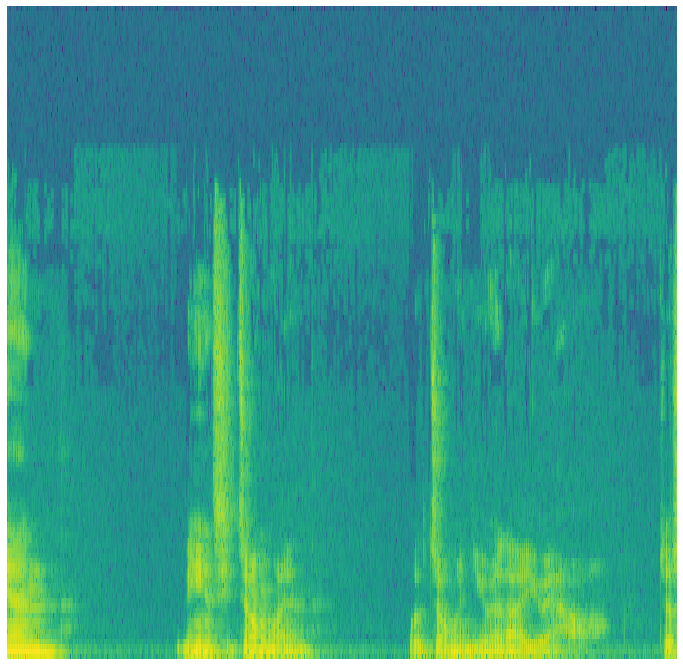

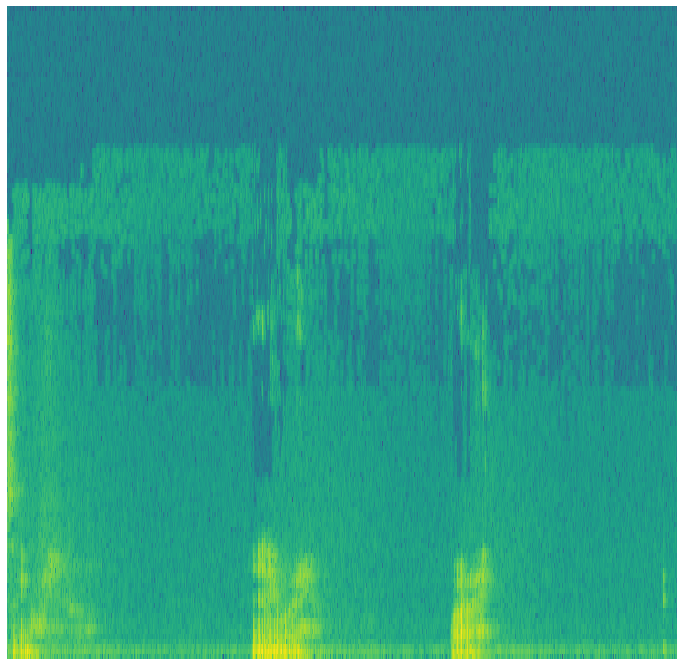

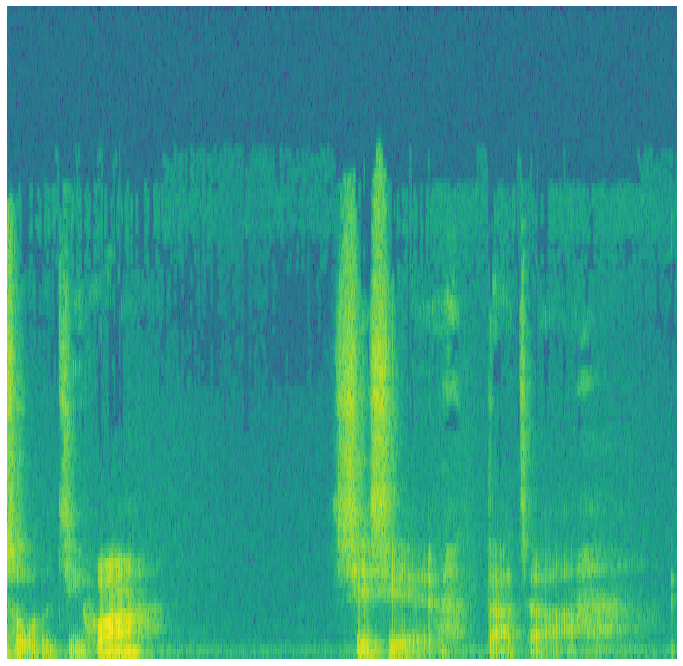

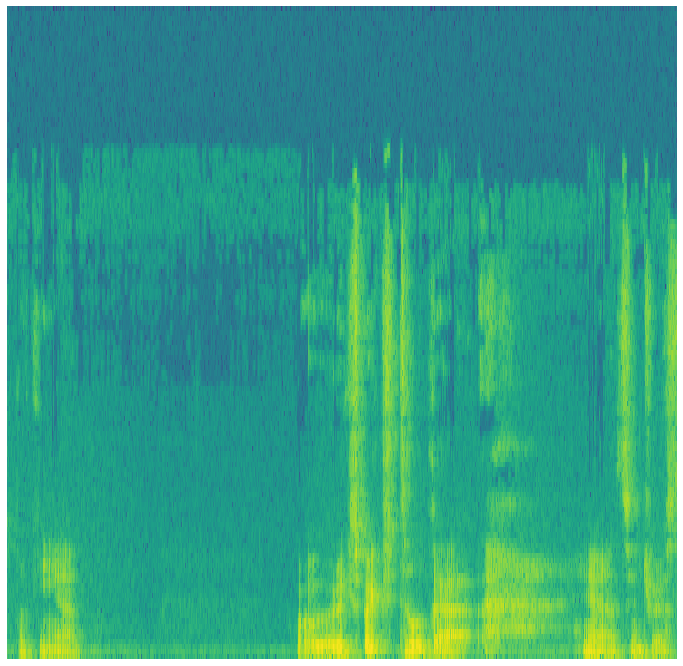

In [157]:
files = listdir("data/actualTests/outputClips")
files
for file in files:
    graphSpectrogram("data/actualTests/outputSpectrograms", "data/actualTests/outputClips/" + file, plot=True)

In [169]:
import numpy as np
import IPython.display as ipd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
import PIL.Image as Image
import os

# https://github.com/YerevaNN/Spoken-language-identification/blob/master/augment_data.py

def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))
    
    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    # cols for windowing
    cols = int(np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1)
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))
    
    frames = stride_tricks.as_strided(samples, shape=(cols, frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win
    
    return np.fft.rfft(frames)


def logscale_spec(spec, sr=44100, factor=20., alpha=1.0, f0=0.9, fmax=1):
    # Crop the bins so that we have 431 rows with 256 columns
    spec = spec[:, 0:256]
    
    # Time bins = number of rows, freqbins = number of columns (256)
    timebins, freqbins = np.shape(spec)
    
    # 256 evenly spaced numbers between 0 and 1
    scale = np.linspace(0, 1, freqbins) #** factor
    
    # http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=650310&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel4%2F89%2F14168%2F00650310
    scale = np.array(list(map(lambda x: x * alpha if x <= f0 else (fmax-alpha*f0)/(fmax-f0)*(x-f0)+alpha*f0, scale)))
    
    # Default output is an array [1., 2., 3., ... 255.]
    scale *= (freqbins-1)/max(scale)

    # 431 rows with 256 columns of 0.+0j
    newspec = np.complex128(np.zeros([timebins, freqbins]))
    
    # Gives a straight line response... 
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    
    freqs = [0.0 for i in range(freqbins)]
    totw = [0.0 for i in range(freqbins)]
    for i in range(0, freqbins):
        if (i < 1 or i + 1 >= freqbins):
            newspec[:, i] += spec[:, i]
            freqs[i] += allfreqs[i]
            totw[i] += 1.0
            continue
        else:
            # scale[15] = 17.2
            w_up = scale[i] - np.floor(scale[i])
            w_down = 1 - w_up
            j = int(np.floor(scale[i]))
           
            newspec[:, j] += w_down * spec[:, i]
            freqs[j] += w_down * allfreqs[i]
            totw[j] += w_down
            
            newspec[:, j + 1] += w_up * spec[:, i]
            freqs[j + 1] += w_up * allfreqs[i]
            totw[j + 1] += w_up
    
    for i in range(len(freqs)):
        if (totw[i] > 1e-6):
            freqs[i] /= totw[i]
    
    return newspec, freqs


def savefftimage(audiopath, binsize=2**10, name='tmp.png', alpha=1, offset=0):
    samplerate, samples = wav.read(audiopath)
    s = stft(samples, binsize)
    sshow, freq = logscale_spec(s, factor=1, sr=samplerate, alpha=alpha)
    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel
    timebins, freqbins = np.shape(ims)
    ims = np.transpose(ims)
    ims = ims[0:256, offset:offset+768] # 0-11khz, ~9s interval
    #print "ims.shape", ims.shape
    
    image = Image.fromarray(ims) 
    image = image.convert('L')
    image.save(name)
    

In [174]:
from os import listdir
from os.path import isfile, join

files = listdir("data/clipsChinese")
for file in files:
    outname = "data/spectrogramsChinese/" + file + ".png"
    savefftimage("data/clipsChinese/" + file, name=outname)

In [175]:
from os import listdir
from os.path import isfile, join

files = listdir("data/clipsEnglish")
for file in files:
    outname = "data/spectrogramsEnglish/" + file + ".png"
    savefftimage("data/clipsEnglish/" + file, name=outname)

In [177]:
files = listdir("data/actualTests/outputClips")
files
for file in files:
    outname = "data/actualTests/outputSpectrograms/" + file + ".png"
    savefftimage("data/actualTests/outputClips/" + file, name=outname)